In [1]:
import sys
#sys.path.append('/Users/marco/Development/Python/ISR/isr_spectrum/src/')
sys.path.append('../src/')
print(sys.path)

['/Users/marco/.pyenv/versions/3.12.0/lib/python312.zip', '/Users/marco/.pyenv/versions/3.12.0/lib/python3.12', '/Users/marco/.pyenv/versions/3.12.0/lib/python3.12/lib-dynload', '', '/Users/marco/.pyenv/versions/3.12.0/lib/python3.12/site-packages', '../src/']


In [2]:
import plasma_parameters as plasma_param
import physical_constants as phys_cons
from isr_spectrum import isrSpectrum
import numpy as np
import matplotlib.pyplot as plt
import time 
%matplotlib ipympl

In [10]:
Ne = 2E11
Bm = 36E-6
Te = 1000
Ti = 1000
ion_mass = 16
ion_comp = 1
#Ti = 1000.
#ion_mass = 16
#ion_comp = 1

plasma = plasma_param.Plasma(Ne,Bm,Te,Ti,ion_mass,ion_comp)

N = int(100E3)
fs = 10E6
frad = 440E6
lambdaB = phys_cons.c / frad / 2
aspdeg = 30
modgy = 1
modnu = 2

isr_spc = isrSpectrum(N,fs,lambdaB,aspdeg,plasma,modgy=modgy,modnu=modnu)


Text(0.5, 1.0, 'Eficiency factor 0.50201664')

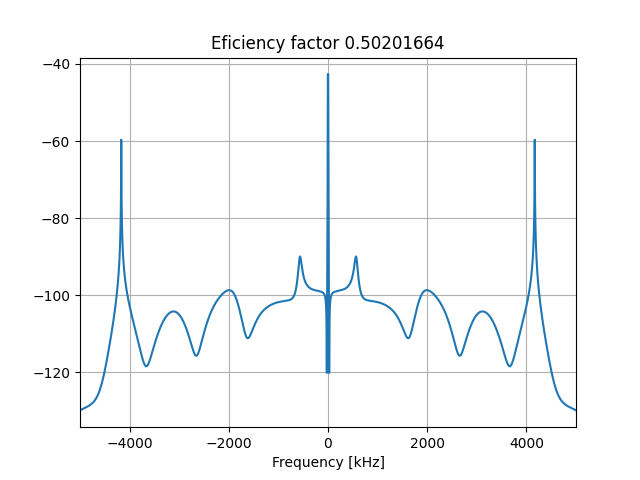

In [11]:
plt.figure()
plt.plot(isr_spc.f/1E3,10*np.log10(isr_spc.spc))
#plt.plot(isr_spc.f/1E3,10*np.log10(isr_spc.spc))
#plt.plot(isr_spc.f/1E3,10*np.log10(isr_spc.spce))
#plt.plot(isr_spc.f/1E3,10*np.log10(isr_spc.spci))
plt.grid()
plt.xlim([-fs/2E3,fs/2E3])
plt.xlabel('Frequency [kHz]')
plt.title('Eficiency factor %0.8f' % isr_spc.nrcs)


In [12]:

#modgy = 1
#modnu = 2
Te_arr = [500,1000,1500,2000,2500]
Ti_arr = [500,1000,1500,2000,2500]
M = len(Te_arr)

f = (np.arange(N)-N/2)*fs/N
spc = np.zeros((N,M))
spce = np.zeros((N,M))
spci = np.zeros((N,M))

t0 = time.time()
for m in range(M):
    
    plasma = plasma_param.Plasma(Ne,Bm,Te_arr[m],Ti_arr[m],ion_mass,ion_comp)

    isr_spc = isrSpectrum(N,fs,lambdaB,aspdeg,plasma,modgy=modgy,modnu=modnu)
    spc[:,m] = isr_spc.spc
    spce[:,m] = isr_spc.spce
    spci[:,m] = isr_spc.spci
t1 = time.time()
    
print(t1-t0)

1.791477918624878


Text(0.5, 0, 'Frequency [kHz]')

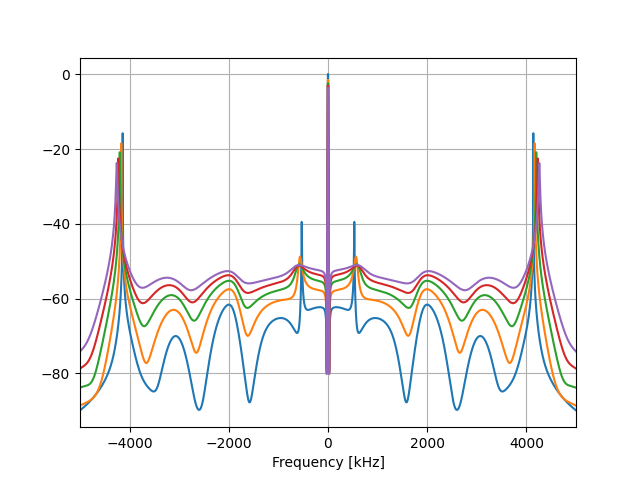

In [ ]:
spc_max = np.amax(spc)*0 +1
spc_dB = 10*np.log10(spc/spc_max)

plt.figure()
plt.plot(f/1E3,spc_dB)
plt.grid()
plt.xlim([-fs/2E3,fs/2E3])
plt.xlabel('Frequency [kHz]')

#plt.figure()
#im = plt.pcolormesh(f/1E3,np.arange(M),spc_dB.T,shading='auto',cmap='jet')
#plt.colorbar(im)
#plt.xlabel('Frequency [kHz]')
